In [ ]:
#Formulate Hypotheses
#Hypothesis 1: The number of electric vehicles (EVs) has increased significantly over time in Washington state.
#Hypothesis 2: The percentage of electric vehicles compared to non-electric vehicles is higher in urban counties than in rural counties within Washington state.


In [ ]:
#Hypothesis 1: Increase in EVs Over Time
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Plot the trends of EVs over time
plt.figure(figsize=(8, 4))
sns.lineplot(data=wa_agg_data, x='Date', y='Electric Vehicle (EV) Total', label='EV Total')
plt.title('Trends of Electric Vehicles Over Time in Washington State')
plt.xlabel('Date')
plt.ylabel('Number of Electric Vehicles')
plt.legend()

plt.show()

# Perform linear regression to test the trend
slope, intercept, r_value, p_value, std_err = linregress(wa_agg_data.index, wa_agg_data['Electric Vehicle (EV) Total'])
print(f'Slope: {slope}, Intercept: {intercept}, R-squared: {r_value**2}, P-value: {p_value}')


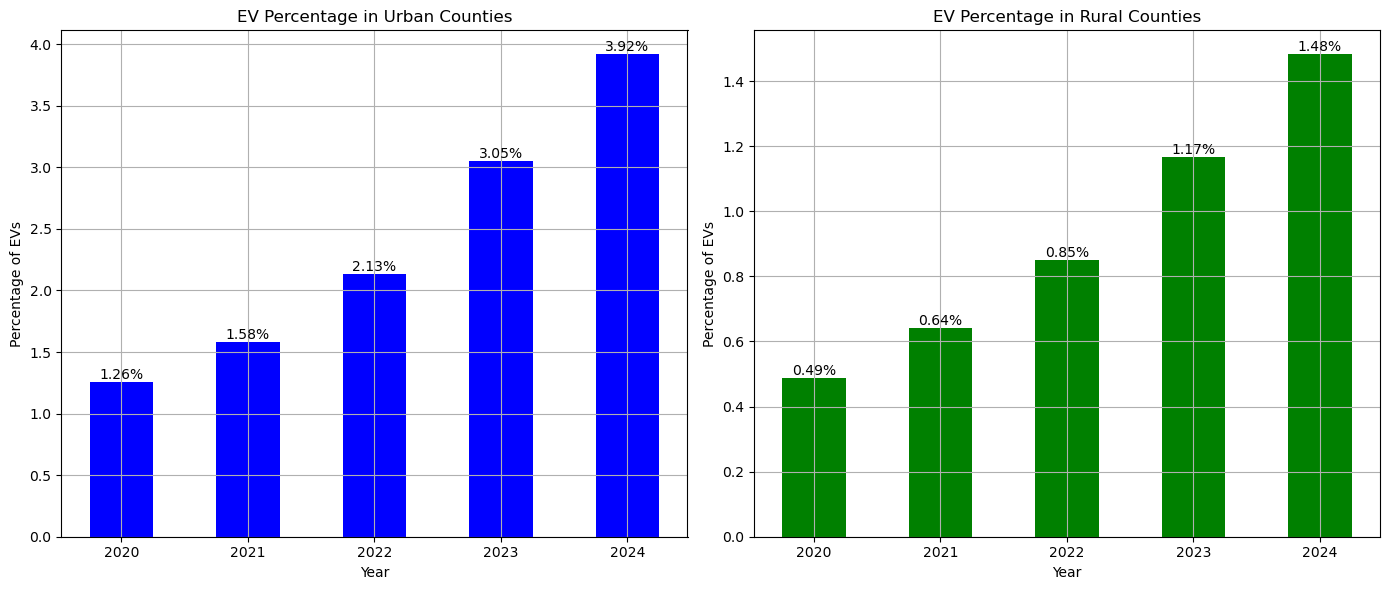

In [2]:
# Hypothesis 2: The percentage of electric vehicles compared to non-electric vehicles is higher in urban counties than in rural counties within Washington state.
import pandas as pd
import matplotlib.pyplot as plt

# List of urban and rural counties in Washington State
urban_counties = ['King', 'Pierce', 'Snohomish', 'Spokane', 'Clark']
rural_counties = ['Whatcom', 'Yakima', 'Skagit', 'Thurston', 'Cowlitz']

# Load the CSV file
file_path = 'C:/repos/group_project_1/Ruby_Project/Electric_Vehicle_Population_Size_History_By_County.csv'
ev_data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format
ev_data['Date'] = pd.to_datetime(ev_data['Date'], errors='coerce')

# Filter out rows with invalid dates
ev_data = ev_data.dropna(subset=['Date'])

# Extract the year from the 'Date' column
ev_data['Year'] = ev_data['Date'].dt.year

# Filter the dataset for Washington State and the years 2020 to 2024
wa_ev_data = ev_data[(ev_data['State'] == 'WA') & (ev_data['Year'] >= 2020) & (ev_data['Year'] <= 2024)].copy()

# Classify counties as urban or rural
wa_ev_data.loc[:, 'County Type'] = wa_ev_data['County'].apply(lambda x: 'Urban' if x in urban_counties else 'Rural')

# Aggregate data by year and county type
wa_annual_ev_data = wa_ev_data.groupby(['Year', 'County Type']).agg({
    'Electric Vehicle (EV) Total': 'sum',
    'Non-Electric Vehicle Total': 'sum'
}).reset_index()

# Calculate the total number of vehicles and the percentage of EVs
wa_annual_ev_data['Total Vehicles'] = wa_annual_ev_data['Electric Vehicle (EV) Total'] + wa_annual_ev_data['Non-Electric Vehicle Total']
wa_annual_ev_data['EV Percentage'] = (wa_annual_ev_data['Electric Vehicle (EV) Total'] / wa_annual_ev_data['Total Vehicles']) * 100

# Separate the data for urban and rural counties
urban_data = wa_annual_ev_data[wa_annual_ev_data['County Type'] == 'Urban']
rural_data = wa_annual_ev_data[wa_annual_ev_data['County Type'] == 'Rural']

# Plotting the bar chart with percentages on the bars
plt.figure(figsize=(14, 6))

# Plot for Urban Counties
plt.subplot(1, 2, 1)
plt.bar(urban_data['Year'], urban_data['EV Percentage'], color='b', width=0.5)
for i, value in enumerate(urban_data['EV Percentage']):
    plt.text(urban_data['Year'].iloc[i], value, f'{value:.2f}%', ha='center', va='bottom')
plt.xlabel('Year')
plt.ylabel('Percentage of EVs')
plt.title('EV Percentage in Urban Counties')
plt.grid(True)

# Plot for Rural Counties
plt.subplot(1, 2, 2)
plt.bar(rural_data['Year'], rural_data['EV Percentage'], color='g', width=0.5)
for i, value in enumerate(rural_data['EV Percentage']):
    plt.text(rural_data['Year'].iloc[i], value, f'{value:.2f}%', ha='center', va='bottom')
plt.xlabel('Year')
plt.ylabel('Percentage of EVs')
plt.savefig('Graph_9')
plt.title('EV Percentage in Rural Counties')
plt.grid(True)

plt.tight_layout()
plt.show()



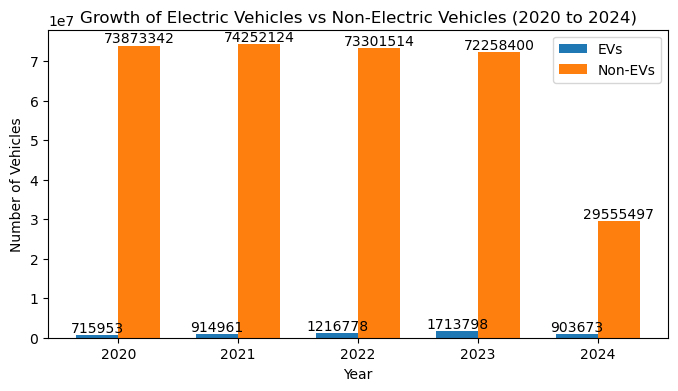

In [6]:
#Growth of electric vehicles VS non electric vehicles from 2020 to 2024
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'C:/repos/group_project_1/Ruby_Project/Electric_Vehicle_Population_Size_History_By_County.csv'
ev_data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format
ev_data['Date'] = pd.to_datetime(ev_data['Date'], errors='coerce')

# Filter out rows with invalid dates
ev_data = ev_data.dropna(subset=['Date'])

# Extract the year from the 'Date' column
ev_data['Year'] = ev_data['Date'].dt.year

# Filter the dataset for the years 2020 to 2024
filtered_ev_data = ev_data[(ev_data['Year'] >= 2020) & (ev_data['Year'] <= 2024)]

# Aggregate data by year for the filtered range
filtered_annual_ev_data = filtered_ev_data.groupby('Year').agg({
    'Electric Vehicle (EV) Total': 'sum',
    'Non-Electric Vehicle Total': 'sum'
}).reset_index()

# Plotting the bar chart with numbers on the bars
plt.figure(figsize=(8, 4))
bar_width = 0.35
index = filtered_annual_ev_data['Year']

bar1 = plt.bar(index, filtered_annual_ev_data['Electric Vehicle (EV) Total'], bar_width, label='EVs')
bar2 = plt.bar(index + bar_width, filtered_annual_ev_data['Non-Electric Vehicle Total'], bar_width, label='Non-EVs')

# Adding numbers on the bars
for i, value in enumerate(filtered_annual_ev_data['Electric Vehicle (EV) Total']):
    plt.text(index[i], value, f'{value}', ha='center', va='bottom')

for i, value in enumerate(filtered_annual_ev_data['Non-Electric Vehicle Total']):
    plt.text(index[i] + bar_width, value, f'{value}', ha='center', va='bottom')

plt.xlabel('Year')
plt.ylabel('Number of Vehicles')

plt.title('Growth of Electric Vehicles vs Non-Electric Vehicles (2020 to 2024)')
plt.xticks(index + bar_width / 2, index)
plt.legend()
plt.savefig('Graph_5')
plt.show()


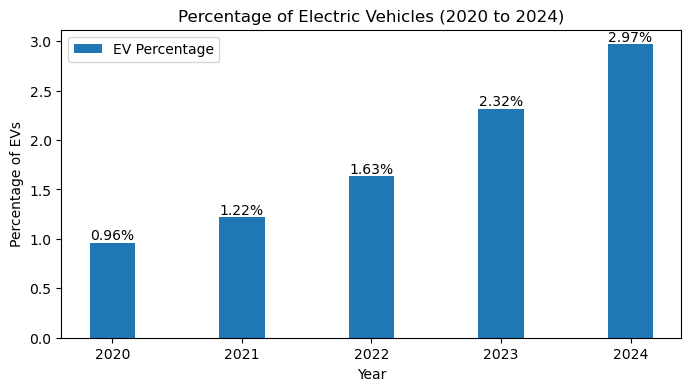

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'C:/repos/group_project_1/Ruby_Project/Electric_Vehicle_Population_Size_History_By_County.csv'
ev_data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format
ev_data['Date'] = pd.to_datetime(ev_data['Date'], errors='coerce')

# Filter out rows with invalid dates
ev_data = ev_data.dropna(subset=['Date'])

# Extract the year from the 'Date' column
ev_data['Year'] = ev_data['Date'].dt.year

# Filter the dataset for the years 2020 to 2024
filtered_ev_data = ev_data[(ev_data['Year'] >= 2020) & (ev_data['Year'] <= 2024)]

# Aggregate data by year for the filtered range
filtered_annual_ev_data = filtered_ev_data.groupby('Year').agg({
    'Electric Vehicle (EV) Total': 'sum',
    'Non-Electric Vehicle Total': 'sum'
}).reset_index()

# Calculate the total number of vehicles and the percentage of EVs
filtered_annual_ev_data['Total Vehicles'] = filtered_annual_ev_data['Electric Vehicle (EV) Total'] + filtered_annual_ev_data['Non-Electric Vehicle Total']
filtered_annual_ev_data['EV Percentage'] = (filtered_annual_ev_data['Electric Vehicle (EV) Total'] / filtered_annual_ev_data['Total Vehicles']) * 100

# Plotting the bar chart with percentage numbers on the bars
plt.figure(figsize=(8, 4))
bar_width = 0.35
index = filtered_annual_ev_data['Year']

bars = plt.bar(index, filtered_annual_ev_data['EV Percentage'], bar_width, label='EV Percentage')

# Adding percentage numbers on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

plt.xlabel('Year')
plt.ylabel('Percentage of EVs')
plt.savefig('Graph_6')
plt.title('Percentage of Electric Vehicles (2020 to 2024)')
plt.xticks(index)
plt.legend()

plt.show()


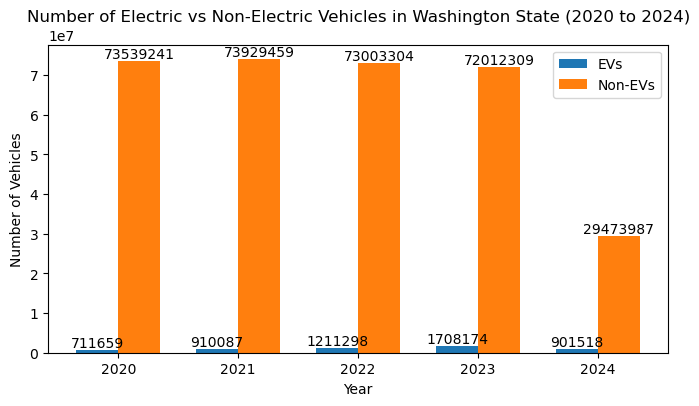

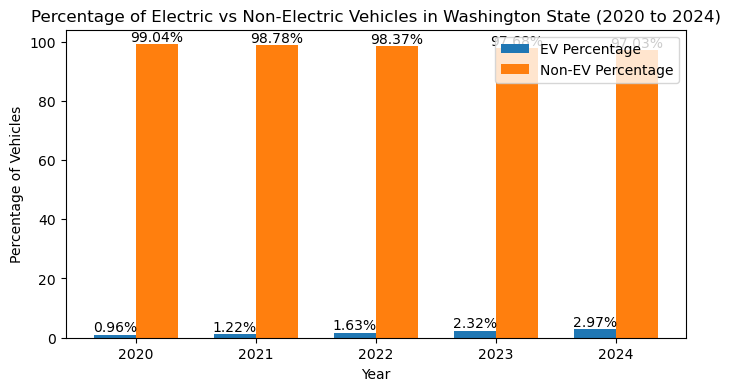

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'C:/repos/group_project_1/Ruby_Project/Electric_Vehicle_Population_Size_History_By_County.csv'
ev_data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format
ev_data['Date'] = pd.to_datetime(ev_data['Date'], errors='coerce')

# Filter out rows with invalid dates
ev_data = ev_data.dropna(subset=['Date'])

# Extract the year from the 'Date' column
ev_data['Year'] = ev_data['Date'].dt.year

# Filter the dataset for Washington State and the years 2020 to 2024
wa_ev_data = ev_data[(ev_data['State'] == 'WA') & (ev_data['Year'] >= 2020) & (ev_data['Year'] <= 2024)]

# Aggregate data by year for the filtered range
wa_annual_ev_data = wa_ev_data.groupby('Year').agg({
    'Electric Vehicle (EV) Total': 'sum',
    'Non-Electric Vehicle Total': 'sum'
}).reset_index()

# Calculate the total number of vehicles and the percentage of EVs
wa_annual_ev_data['Total Vehicles'] = wa_annual_ev_data['Electric Vehicle (EV) Total'] + wa_annual_ev_data['Non-Electric Vehicle Total']
wa_annual_ev_data['EV Percentage'] = (wa_annual_ev_data['Electric Vehicle (EV) Total'] / wa_annual_ev_data['Total Vehicles']) * 100
wa_annual_ev_data['Non-EV Percentage'] = (wa_annual_ev_data['Non-Electric Vehicle Total'] / wa_annual_ev_data['Total Vehicles']) * 100

# Plotting the bar chart with absolute numbers on the bars
plt.figure(figsize=(8, 4))
bar_width = 0.35
index = wa_annual_ev_data['Year']

bar1 = plt.bar(index - bar_width/2, wa_annual_ev_data['Electric Vehicle (EV) Total'], bar_width, label='EVs')
bar2 = plt.bar(index + bar_width/2, wa_annual_ev_data['Non-Electric Vehicle Total'], bar_width, label='Non-EVs')

# Adding numbers on the bars
for i, value in enumerate(wa_annual_ev_data['Electric Vehicle (EV) Total']):
    plt.text(index[i] - bar_width/2, value, f'{value}', ha='center', va='bottom')

for i, value in enumerate(wa_annual_ev_data['Non-Electric Vehicle Total']):
    plt.text(index[i] + bar_width/2, value, f'{value}', ha='center', va='bottom')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.savefig('Graph_7')
plt.title('Number of Electric vs Non-Electric Vehicles in Washington State (2020 to 2024)')
plt.xticks(index)
plt.legend()
plt.show()

# Plotting the bar chart with percentages on the bars
plt.figure(figsize=(8, 4))
bar_width = 0.35
index = wa_annual_ev_data['Year']

bar1 = plt.bar(index - bar_width/2, wa_annual_ev_data['EV Percentage'], bar_width, label='EV Percentage')
bar2 = plt.bar(index + bar_width/2, wa_annual_ev_data['Non-EV Percentage'], bar_width, label='Non-EV Percentage')

# Adding percentage numbers on the bars
for i, value in enumerate(wa_annual_ev_data['EV Percentage']):
    plt.text(index[i] - bar_width/2, value, f'{value:.2f}%', ha='center', va='bottom')

for i, value in enumerate(wa_annual_ev_data['Non-EV Percentage']):
    plt.text(index[i] + bar_width/2, value, f'{value:.2f}%', ha='center', va='bottom')

plt.xlabel('Year')
plt.ylabel('Percentage of Vehicles')
plt.savefig('Graph_8')
plt.title('Percentage of Electric vs Non-Electric Vehicles in Washington State (2020 to 2024)')
plt.xticks(index)
plt.legend()

plt.show()


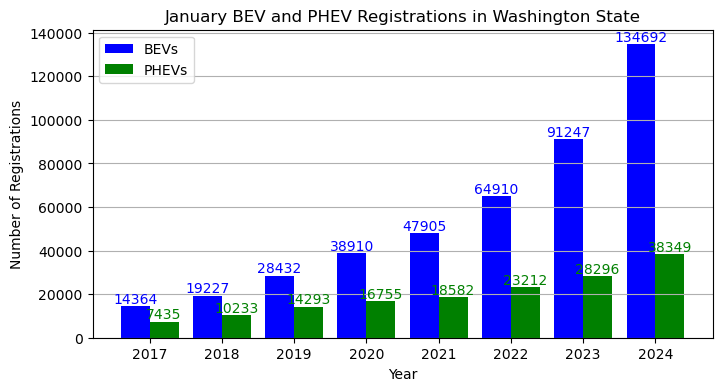

In [20]:
#January BEV and PHEV Registrations in Washington State
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'C:/repos/group_project_1/Ruby_Project/Electric_Vehicle_Population_Size_History_By_County.csv'
zev_data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format
zev_data['Date'] = pd.to_datetime(zev_data['Date'], errors='coerce')

# Filter out rows with invalid dates
zev_data = zev_data.dropna(subset=['Date'])

# Extract the year and month from the 'Date' column
zev_data['Year'] = zev_data['Date'].dt.year
zev_data['Month'] = zev_data['Date'].dt.month

# Filter the dataset for Washington State and the month of January
wa_zev_data = zev_data[(zev_data['State'] == 'WA') & (zev_data['Month'] == 1)]

# Aggregate data by year for January registrations
january_zev_data = wa_zev_data.groupby('Year').agg({
    'Battery Electric Vehicles (BEVs)': 'sum',
    'Plug-In Hybrid Electric Vehicles (PHEVs)': 'sum'
}).reset_index()

# Plotting the histogram
plt.figure(figsize=(8, 4))

# Histogram for BEVs
plt.bar(january_zev_data['Year'] - 0.2, january_zev_data['Battery Electric Vehicles (BEVs)'], width=0.4, label='BEVs', color='b', align='center')
# Histogram for PHEVs
plt.bar(january_zev_data['Year'] + 0.2, january_zev_data['Plug-In Hybrid Electric Vehicles (PHEVs)'], width=0.4, label='PHEVs', color='g', align='center')

# Adding data labels on the bars
for i in range(len(january_zev_data)):
    plt.text(january_zev_data['Year'][i] - 0.2, january_zev_data['Battery Electric Vehicles (BEVs)'][i] + 5, 
             str(january_zev_data['Battery Electric Vehicles (BEVs)'][i]), ha='center', va='bottom', color='blue')
    plt.text(january_zev_data['Year'][i] + 0.2, january_zev_data['Plug-In Hybrid Electric Vehicles (PHEVs)'][i] + 5, 
             str(january_zev_data['Plug-In Hybrid Electric Vehicles (PHEVs)'][i]), ha='center', va='bottom', color='green')

plt.xlabel('Year')
plt.ylabel('Number of Registrations')
plt.title('January BEV and PHEV Registrations in Washington State')
plt.savefig('Graph_9')
plt.legend()
plt.grid(axis='y')
plt.show()


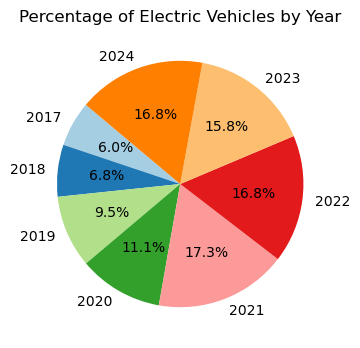

In [3]:
# Mean Percentage of Electric Vehicles by Year

import pandas as pd
import matplotlib.pyplot as plt

# Load the uploaded CSV file
file_path = 'C:/repos/group_project_1/Ruby_Project/Electric_Vehicle_Population_Size_History_By_County.csv'
df = pd.read_csv(file_path)

# Filter and prepare the data (assuming 'Year' and 'Percent Electric Vehicles' columns are available)
# Extract the 'Year' from the 'Date' column and calculate the mean percentage for each year
df['Year'] = df['Date'].str[-4:]
data = df.groupby('Year')['Percent Electric Vehicles'].mean().reset_index()
data.columns = ['Year', 'Percent Electric Vehicles']

# Convert the percentage to actual values for the pie chart
values = data['Percent Electric Vehicles']
labels = data['Year']

# Plotting the pie chart
plt.figure(figsize=(8, 4))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(labels))))
plt.title('Percentage of Electric Vehicles by Year')
plt.savefig('Graph_10')
plt.show()
